<a href="https://colab.research.google.com/github/Janhavi-127/Data-Analyst-Project-Basic-to-Advanced/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load the dataset**

In [ ]:
import pandas as pd

df = pd.read_csv("Tableau Dataset.csv")

In [ ]:
df.shape

(50, 6)

In [ ]:
df.head()

,Product Description,Client Name,Balance Outstanding,Interest Rate,Reporting Date,Client Code
0,Product E,Client5,5000,9%,2022-05-31,Code5
1,Product E,Client10,10000,9%,2022-10-31,Code10
2,Product E,Client5,15000,9%,2023-03-31,Code15
3,Product E,Client10,20000,9%,2023-08-31,Code20
4,Product E,Client5,25000,9%,2024-01-31,Code25


**Clean column names (optional but recommended)**

In [ ]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['Product Description', 'Client Name', 'Balance Outstanding',
       'Interest Rate', 'Reporting Date', 'Client Code'],
      dtype='object')


**Verify if required columns exist**

In [ ]:
print('Interest Rate' in df.columns)
print('Balance Outstanding' in df.columns)

True
True


**Assign the correct column names to variables**

In [ ]:
x_col = 'Interest Rate'  # or replace with exact name from STEP 1
y_col = 'Balance Outstanding'  # or replace


**1 Analyze Outstanding Balances vs. Interest Rates**

**Plot the boxplot**

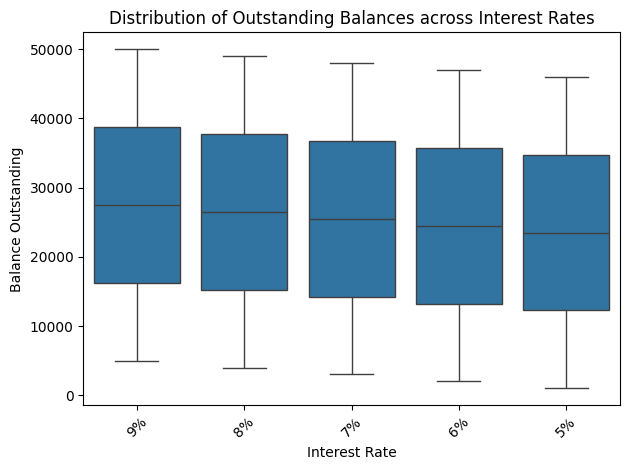

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=x_col, y=y_col, data=df)
plt.title('Distribution of Outstanding Balances across Interest Rates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Select the correct columns**

In [ ]:
x_col = 'Interest Rate'  # Replace if name is different
y_col = 'Balance Outstanding'  # Replace if name is different

selected_df = df[[x_col, y_col]]
print(selected_df.head())


  Interest Rate  Balance Outstanding
0            9%                 5000
1            9%                10000
2            9%                15000
3            9%                20000
4            9%                25000


**2 Correlation Between Interest Rate and Outstanding Balance**

**Remove % and convert to float**

In [ ]:
df['Interest Rate'] = df['Interest Rate'].str.replace('%', '').astype(float)


**Verify the conversion**

In [ ]:
print(df['Interest Rate'].head())
print(df.dtypes)


0    9.0
1    9.0
2    9.0
3    9.0
4    9.0
Name: Interest Rate, dtype: float64
Product Description     object
Client Name             object
Balance Outstanding      int64
Interest Rate          float64
Reporting Date          object
Client Code             object
dtype: object


**Calculate the correlation**

In [ ]:
selected_df = df[['Interest Rate', 'Balance Outstanding']]
correlation = selected_df.corr()
print(correlation)


                     Interest Rate  Balance Outstanding
Interest Rate             1.000000             0.097999
Balance Outstanding       0.097999             1.000000


**Plot the heatmap**

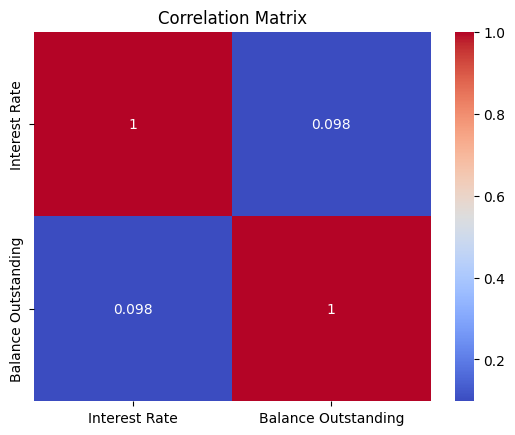

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**3 Top 5 Clients with Highest Balances Over Time**

**Convert 'Reporting Date' to datetime**

In [ ]:
df['Reporting Date'] = pd.to_datetime(df['Reporting Date'])
print(df['Reporting Date'].head())

0   2022-05-31
1   2022-10-31
2   2023-03-31
3   2023-08-31
4   2024-01-31
Name: Reporting Date, dtype: datetime64[ns]


**Find total outstanding balance for each client**

In [ ]:
client_balances = df.groupby('Client Name')['Balance Outstanding'].sum()
print(client_balances.sort_values(ascending=False))


Client Name
Client10        150000
Client9         145000
Client8         140000
Client7         135000
Client6         130000
Client5         125000
Client4         120000
Client3         115000
Client2         110000
Client1         105000
Name: Balance Outstanding, dtype: int64


**Get top 5 clients**

In [ ]:
top_clients = client_balances.sort_values(ascending=False).head(5).index
print(top_clients)

Index([' Client10    ', ' Client9     ', ' Client8     ', ' Client7     ',
       ' Client6     '],
      dtype='object', name='Client Name')


**Filter data to include only top clients**

In [ ]:
# Assuming you want to select top clients based on 'Balance Outstanding'
# You may need to adjust the number (e.g., 10) to get the desired number of top clients
top_clients = df.groupby('Client Name')['Balance Outstanding'].sum().nlargest(10).index

filtered_df = df[df['Client Name'].isin(top_clients)]
print(filtered_df.head())


     Product Description    Client Name  Balance Outstanding  Interest Rate  \
0   Product E              Client5                      5000            9.0   
1   Product E              Client10                    10000            9.0   
2   Product E              Client5                     15000            9.0   
3   Product E              Client10                    20000            9.0   
4   Product E              Client5                     25000            9.0   

  Reporting Date    Client Code  
0     2022-05-31   Code5         
1     2022-10-31   Code10        
2     2023-03-31   Code15        
3     2023-08-31   Code20        
4     2024-01-31   Code25        


**Plot line chart**

In [ ]:
import plotly.express as px

fig = px.line(filtered_df, x='Reporting Date', y='Balance Outstanding',
              color='Client Name', title='Top 5 Clients with Highest Balances Over Time') # Changed 'Client' to 'Client Name'
fig.show()
